**Data Augmentation Exercise**
*   Using TensorFlow and Keras Data Augmentation
*   Using pylab, matplotlib and numpy for diplaying images and numerical computation

In [1]:
%%capture
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from keras import layers
import keras

**Loading TensorFlow Dataset**
*   Describing the different categories for training dataset (train_ds),validation dataset (val_ds) and test datasets (test_ds)
*   Using the 'cats_vs_dogs' dataset found in the TensorFlow Datasets, size 786.68MB
*   Split the datasets into different sizes for the three categories with train_ds=80% of 'cats_vs_dogs', val_ds=(90-80)%=10% of 'cats_vs_dogs' and test_ds=(100-90)%=10% of 'cats_vs_dogs'
*   with_info=True allows it to load the dataset tuple (ds, ds_info) from tfds containing dataset information (version, features etc)





In [2]:
%%capture
(train_ds, val_ds, test_ds), metadata=tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

**Data Analysis**
*   There are two classes in the loaded 'cats_vs_dogs' datasets
*   Metadata is used to describe the number of classes 'cats' and 'dogs'

In [3]:
num_classes=metadata.features['label'].num_classes
print(num_classes)

2


Using Iterators to extract 12 random images with labels from the training dataset and using %pylab inline or matplotlib to display it

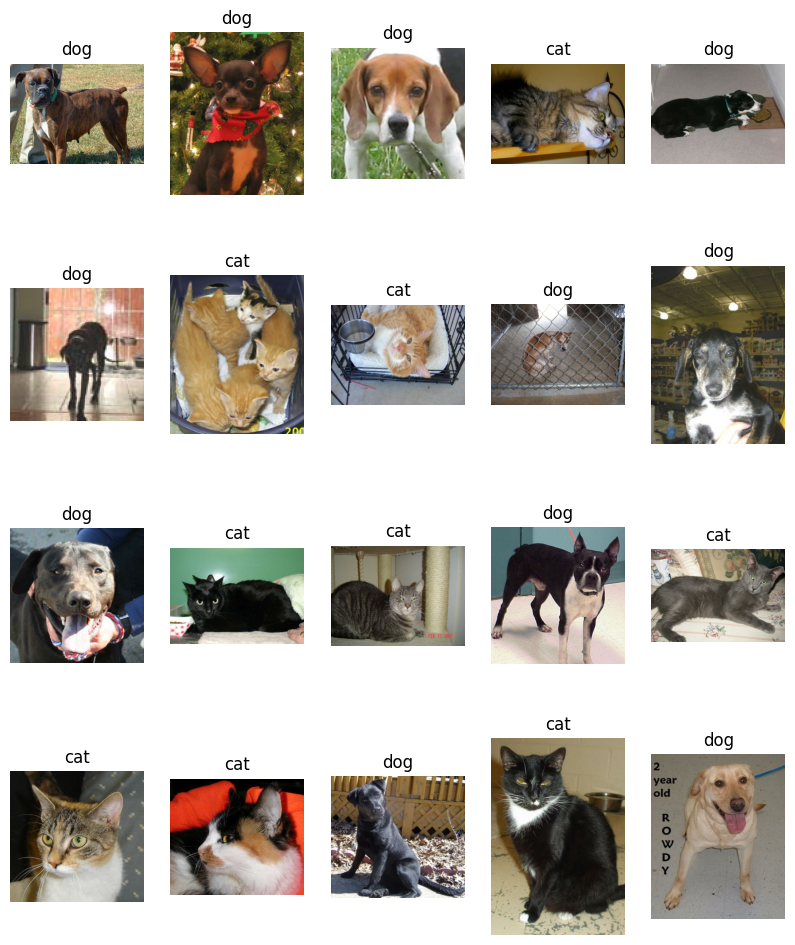

In [15]:
get_label_name=metadata.features['label'].int2str
train_iter=iter(train_ds)
fig = plt.figure(figsize=(10,12))
for x in range (20):
  image, label=next(train_iter)
  fig.add_subplot(4,5,x+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(get_label_name(label));

Using Iterators to extract 12 random images with labels from the test dataset and using %pylab inline or matplotlib to display it

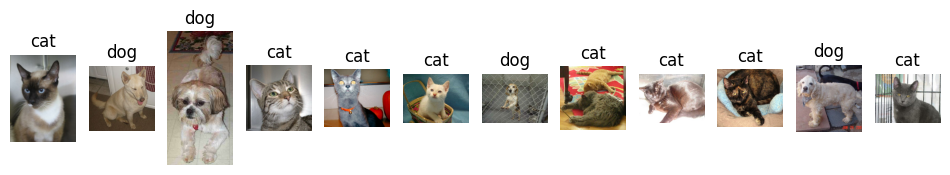

In [16]:
get_label_name=metadata.features['label'].int2str
test_iter=iter(test_ds)
fig = plt.figure(figsize=(12,16))
for x in range (12):
  image, label=next(test_iter)
  fig.add_subplot(1,12,x+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(get_label_name(label));

Using Iterators to extract 4 random images with labels from the validations dataset and using %pylab inline or matplotlib to display it

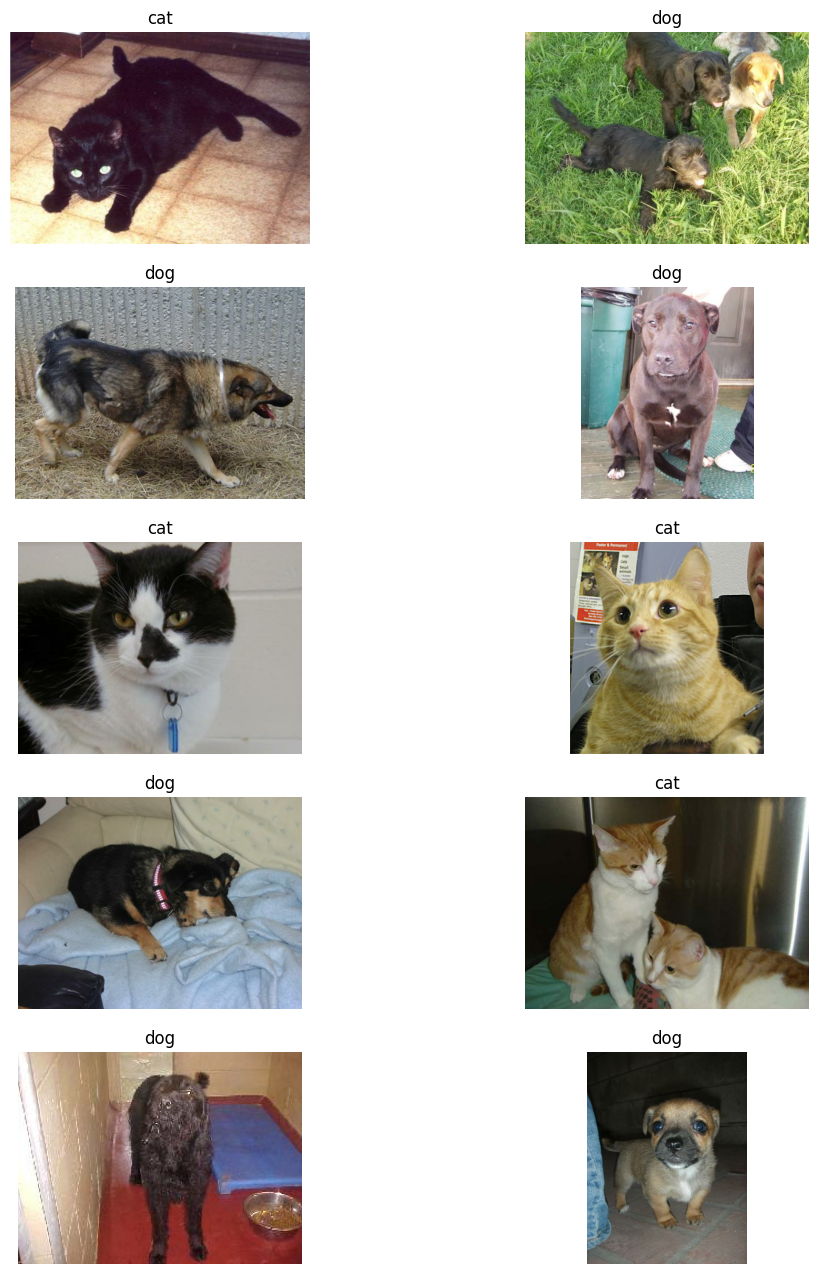

In [17]:
get_label_name=metadata.features['label'].int2str
val_iter=iter(val_ds)
fig = plt.figure(figsize=(12,16))
for x in range (10):
  image, label=next(val_iter)
  fig.add_subplot(5,2,x+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(get_label_name(label));

**Data Augmentation with Keras Sequential**


*   Using keras.Sequential() to build the model and add augmentation layers
*   Resize and Rescale using keras sequential
*   Resizing to a smalller size saves time, memory and computing
*   Notice that it will pick the last image shown from the previous result at all times




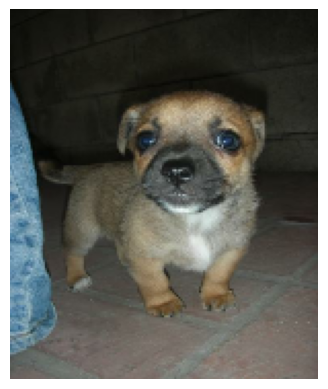

In [20]:
IMG_SIZE=180
IMG_SIZE1=150

resize_and_rescale=keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE1),
    layers.Rescaling(1./255)
])

result=resize_and_rescale(image)
plt.axis('off')
plt.imshow(result);

**Random rotate and flip**


*   Applying random rotate and flipping the same image
*   Using loop, subplot and imshow to display 6 images of the same image with random geometric augmentation



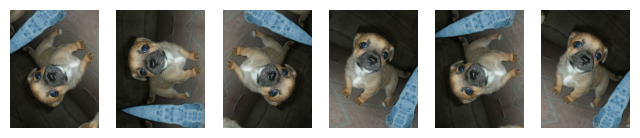

In [21]:
data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

**Doing More with Augmentation with Keras Sequential**

*   Adding RandContrast to the image
*   HeightCrop to the image
*   WidthCrop to the image
*   RandomZoom the image

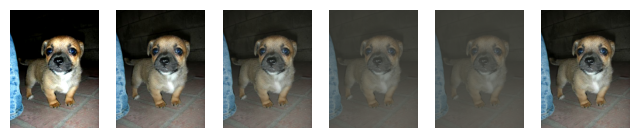

In [22]:
data_augmentation=keras.Sequential([
    layers.RandomContrast(0.9),
   
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

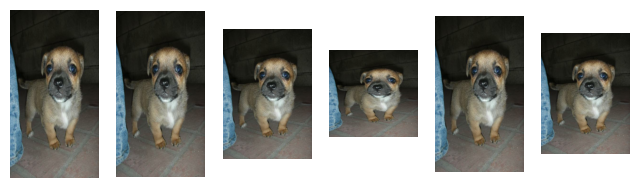

In [23]:
data_augmentation=keras.Sequential([
   
    layers.RandomHeight(0.5, interpolation="bilinear"),
   
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

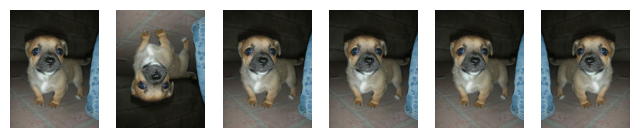

In [24]:
data_augmentation=keras.Sequential([

    layers.RandomFlip("horizontal_and_vertical"),
   
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

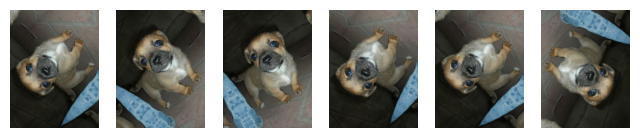

In [25]:
data_augmentation=keras.Sequential([
    layers.RandomRotation(0.5),
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

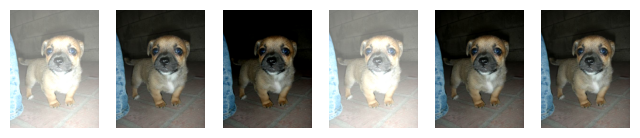

In [26]:
data_augmentation=keras.Sequential([
   layers.RandomBrightness(0.5,value_range=(0,255))
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

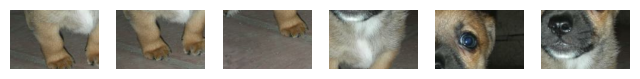

In [27]:
data_augmentation=keras.Sequential([
    layers.RandomCrop(100,150)
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

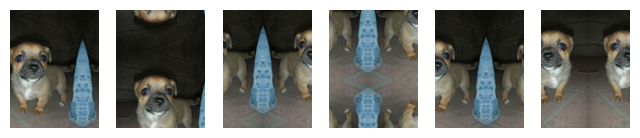

In [29]:
data_augmentation=keras.Sequential([
    layers.RandomTranslation(0.5,1, fill_mode="reflect", interpolation="bilinear")
  
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

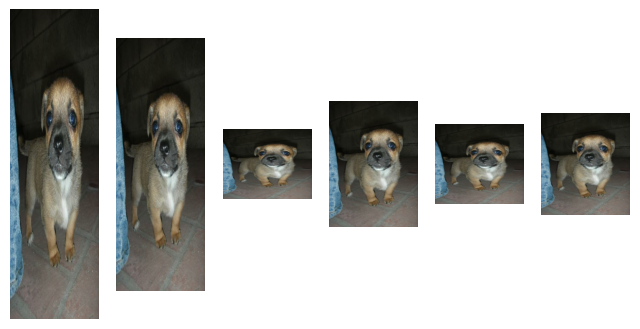

In [33]:
data_augmentation=keras.Sequential([
    layers.RandomWidth(0.7, interpolation="bilinear")
  
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

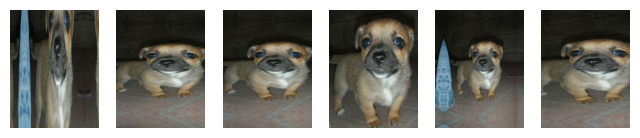

In [34]:
data_augmentation=keras.Sequential([
    layers.RandomZoom(0.7, 0.5, fill_mode="reflect",interpolation="bilinear")
  
])

plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

**Directly Adding to the model Layer**


*   There are two ways to apply augmentation to the images
*   The first method is by directly adding the augmentation layers to the model as above
*   The second method is the apply augmentation function to the trained set using datase.map





In [35]:
from keras.layers.serialization import activation
model = keras.Sequential([
    # Add the preprocessing layers you created earlier
    resize_and_rescale,
    data_augmentation,
    # Add the model layers 
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    #relu: Rectified Linear Unit
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

**Applying the augmentation function using .map**


In [45]:
aug_ds=train_ds.map(lambda x, y: (data_augmentation(x, training=True),y))


In [37]:
aug_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

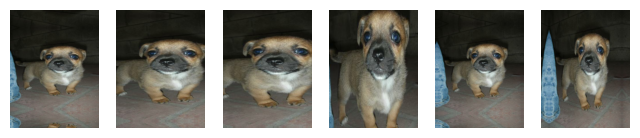

In [40]:
plt.figure(figsize=(8,7))
for i in range(6):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

**Data Preprocessing**


*   Apply resize and rescale to the entire dataset
*   If the shuffle is true, it will shuffle the dataset
*   Convert the data into bacthes using 32 bacth sizes
*   If the augment is True, it will apply the data augmentation function on all datasets
*   Finally, use Dataset.prefetch to overlap the training of the model on the GPU with data processing



In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)


train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

**Model Building**
Here we create a simple model with convolution and dense layers. make sure the input is the same to the image shape

In [ ]:
model=keras.Sequential([
    layers.Conv2D(batch_size,(3,3),input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same', activation ='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(batch_size, activation='relu'),
    layers.Dense(1, activation='softmax')
])

**Training and Evaluation**


1.   Next is ti compile the model and train it for one epoch.
2.   The optimizer is Adam, the loss function is Binary Cross Entropy and the metric is accuracy
2.   This model building and training gives an idea of how to augment images and train the model